In [1]:
# Note: the book "Introduction to Machine Learning with Python" by Andreas C. Müller & Sarah Guido was a massive help for
# this project

# The libraries we'll need

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
import statistics
import math
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import random
import scipy.misc as smp
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings(action="ignore")

%matplotlib inline

# dataset

## SKlearn

In [2]:
# Here we import the lfw_people dataset. We're going to use this as "noise" later on

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) # The "min_faces_per_person" parameter can be changed in order to combat the amount of classes. The higher the parameter the less classes.
image_shape = people.images[0].shape

In [3]:
# We make sure that a face bellonging to a single person may only come up 10 times at most

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:10]] = 1
    X_people = people.data[mask]

In [4]:
# Here we see how many pictures we end up with from the lfw_people dataset

original_len = len(X_people)
print(original_len)

620


### Preparing the target var

A face that comes from the original dataset will have class "0". Later on we'll introduce another class

In [5]:
y = np.zeros(len(X_people))

## Andreas

Loading in the pictures beloning to "Andreas" and putting the pixeldata into an array

In [6]:
os.chdir("C:\\Users\\kebbe\\Nod Coding\\Projekt last\\Nod pictures\\Andreas Kördel")

In [7]:
lst_an=[]
for i in range(1, 13):
    new_lst=[i[0] for i in list(Image.open(f'Andreas ({i}).jpg').getdata())]
    lst_an.append(new_lst)
    
lst_an=np.array(lst_an)

## Axel

Loading in the pictures beloning to "Axel" and putting the pixeldata into an array

In [8]:
os.chdir("C:\\Users\\kebbe\\Nod Coding\\Projekt last\\Nod pictures\\Axel Cajselius")

In [9]:
lst_ax=[]
for i in range(1, 5):
    new_lst=[i[0] for i in list(Image.open(f'Axel ({i}).jpg').getdata())]
    lst_ax.append(new_lst)
    
lst_ax=np.array(lst_ax)

## Filip

Loading in the pictures beloning to "Filip" and putting the pixeldata into an array

In [10]:
os.chdir("C:\\Users\\kebbe\\Nod Coding\\Projekt last\\Nod pictures\\Filip Lundqvist")

In [11]:
lst_fi=[]
for i in range(1, 6):
    new_lst=[i[0] for i in list(Image.open(f'Filip ({i}).jpg').getdata())]
    lst_fi.append(new_lst)
    
lst_fi=np.array(lst_fi)

## Gustav

Loading in the pictures beloning to "Gustav" and putting the pixeldata into an array

In [12]:
os.chdir("C:\\Users\\kebbe\\Nod Coding\\Projekt last\\Nod pictures\\Gustav Svensson")

In [13]:
lst_gu=[]
for i in range(1, 11):
    new_lst=[i[0] for i in list(Image.open(f'Gustav ({i}).jpg').getdata())]
    lst_gu.append(new_lst)
    
lst_gu=np.array(lst_gu)

## Kevin

Loading in the pictures beloning to "Kevin" and putting the pixeldata into an array

In [14]:
os.chdir("C:\\Users\\kebbe\\Nod Coding\\Projekt last\\Nod pictures\\Kevin Björk")

In [15]:
lst_ke=[]
for i in range(1, 11):
    new_lst=[i[0] for i in list(Image.open(f'Kevin ({i}).jpg').getdata())]
    lst_ke.append(new_lst)
    
lst_ke=np.array(lst_ke)

## Nils

Loading in the pictures beloning to "Nils" and putting the pixeldata into an array

In [16]:
os.chdir("C:\\Users\\kebbe\\Nod Coding\\Projekt last\\Nod pictures\\Nils Skoglund")

In [17]:
lst_ni=[]
for i in range(1, 12):
    new_lst=[i[0] for i in list(Image.open(f'Nils ({i}).jpg').getdata())]
    lst_ni.append(new_lst)
    
lst_ni=np.array(lst_ni)

## Philip

Loading in the pictures beloning to "Philip" and putting the pixeldata into an array

In [18]:
os.chdir("C:\\Users\\kebbe\\Nod Coding\\Projekt last\\Nod pictures\\Philip Gordin")

In [19]:
lst_pi=[]
for i in range(1, 6):
    new_lst=[i[0] for i in list(Image.open(f'Philip ({i}).jpg').getdata())]
    lst_pi.append(new_lst)
    
new_lst=[i[0] for i in list(Image.open(f'Philip (6).png').getdata())]
lst_pi.append(new_lst)

lst_pi=np.array(lst_pi)

## Vincent

Loading in the pictures beloning to "Vincent" and putting the pixeldata into an array

In [20]:
os.chdir("C:\\Users\\kebbe\\Nod Coding\\Projekt last\\Nod pictures\\Vincent Wallenborg")

In [21]:
lst_vi=[]
for i in range(1, 10):
    new_lst=[i[0] for i in list(Image.open(f'Vincent ({i}).jpg').getdata())]
    lst_vi.append(new_lst)
    
lst_vi=np.array(lst_vi)

## Adding them together

Here we add the pixeldata from the "Nod" faces to the faces of lfw_people

In [22]:
X_people = np.append(X_people, lst_an, axis=0)
X_people = np.append(X_people, lst_ax, axis=0)
X_people = np.append(X_people, lst_fi, axis=0)
X_people = np.append(X_people, lst_gu, axis=0)
X_people = np.append(X_people, lst_ke, axis=0)
X_people = np.append(X_people, lst_ni, axis=0)
X_people = np.append(X_people, lst_pi, axis=0)
X_people = np.append(X_people, lst_vi, axis=0)
X_people = X_people/255 # This line makes it so that our pixel values will be between 0 and 1

In [23]:
X_people.shape

(687, 5655)

## Target var

Here we complement our previous target variable with a new class, the "Nod" class

In [24]:
new_y = np.ones(len(X_people)-len(y))

In [25]:
y = np.append(y, new_y)

# PCA

We do a PCA of the dataset in order to take a look at the components. From this we might get an insight into what the machine actually looks at when analyzing faces

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y)

In [59]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

In [60]:
pca_explained = pca.explained_variance_ratio_

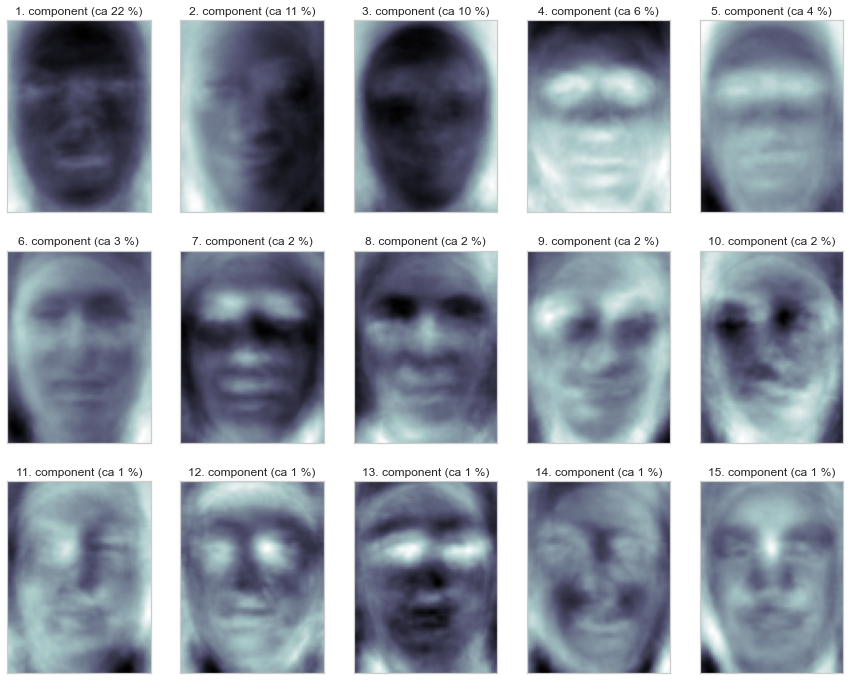

In [61]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="bone")
    ax.set_title(f"{i + 1}. component (ca {round(pca_explained[i]*100)} %)") # The percentage indicates how much variance the component captures

## PCA of Nod only

In [62]:
X_nod = np.append(lst_an, lst_ax, axis=0)
X_nod = np.append(X_nod, lst_fi, axis=0)
X_nod = np.append(X_nod, lst_gu, axis=0)
X_nod = np.append(X_nod, lst_ke, axis=0)
X_nod = np.append(X_nod, lst_ni, axis=0)
X_nod = np.append(X_nod, lst_pi, axis=0)
X_nod = np.append(X_nod, lst_vi, axis=0)
X_nod = X_nod/255

pca_nod = PCA(n_components=67, whiten=True, random_state=0).fit(X_nod)

In [63]:
pca_explained = pca_nod.explained_variance_ratio_

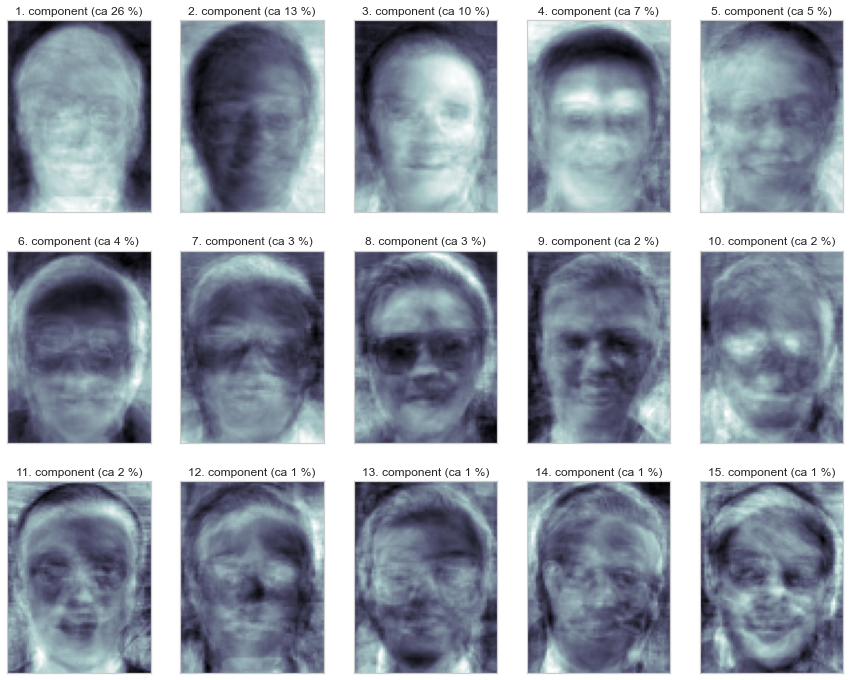

In [64]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca_nod.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="bone")
    ax.set_title(f"{i + 1}. component (ca {round(pca_explained[i]*100)} %)")

# Clustering
On the topic of trying to figure out how the machine thinks we allow the machine to categorize the images using clustering to see if we can find similarities within the clusters

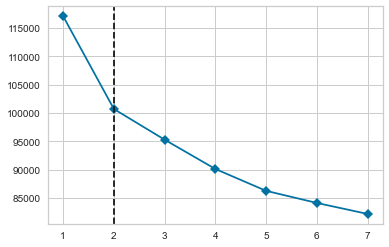

In [65]:
# Using an elbow plot as a way of figuring out how many clusters are necessary.

elbow_viz = KElbowVisualizer(KMeans(), k=(1, 8), timings=False)
elbow_viz.fit(X_people)
plt.show()

In [66]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_people)

KMeans(n_clusters=2)

In [67]:
# we find the index positions of the images belonging to the different clusters
x=0
index_clus_1=[]
index_clus_0=[]
for i in kmeans.labels_:
    if i==1:
        index_clus_1.append(x)
    else:
        index_clus_0.append(x)
    x+=1

In [68]:
# This cell converts the shape of the pixeldata from a flat list into a nested list. The components of the nested list are:
# pixel height
# pixel width
# RGB values (these three numbers will be identical given that we only look at black and white images)

for i in index_clus_1[0:15]: # we only visualize some images for convenience
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_people[i][x])
            lst.append(X_people[i][x])
            lst.append(X_people[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_people=[]
    for l in X_people[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_people.append(lst)

    # Here we remake the images from the pixel data
    im2 = Image.fromarray((np.array(new_X_people, dtype='uint8')).reshape(shape))
    im2.show()

In [69]:
# This cell converts the shape of the pixeldata from a flat list into a nested list. The components of the nested list are:
# pixel height
# pixel width
# RGB values (these three numbers will be identical given that we only look at black and white images)

for i in index_clus_0[0:15]: 
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_people[i][x])
            lst.append(X_people[i][x])
            lst.append(X_people[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_people=[]
    for l in X_people[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_people.append(lst)

    # Here we remake the images from the pixel data
    im2 = Image.fromarray((np.array(new_X_people, dtype='uint8')).reshape(shape))
    im2.show()

## Clustering - Nod only
Same process but only for the Nod images

In [109]:
X_nod = np.append(lst_an, lst_ax, axis=0)
X_nod = np.append(X_nod, lst_fi, axis=0)
X_nod = np.append(X_nod, lst_gu, axis=0)
X_nod = np.append(X_nod, lst_ke, axis=0)
X_nod = np.append(X_nod, lst_ni, axis=0)
X_nod = np.append(X_nod, lst_pi, axis=0)
X_nod = np.append(X_nod, lst_vi, axis=0)
X_nod = X_nod/255

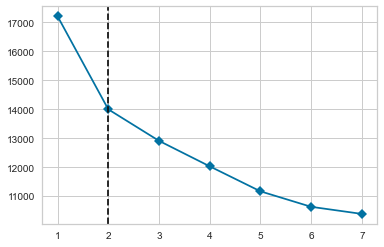

In [110]:
elbow_viz = KElbowVisualizer(KMeans(), k=(1, 8), timings=False)
elbow_viz.fit(X_nod)
plt.show()

In [111]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_nod)

KMeans(n_clusters=2)

In [112]:
x=0
index_clus_1=[]
index_clus_0=[]
for i in kmeans.labels_:
    if i==0:
        index_clus_0.append(x)
    elif i==1:
        index_clus_1.append(x)
    x+=1

In [70]:
for i in index_clus_1[0:15]:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_nod[i][x])
            lst.append(X_nod[i][x])
            lst.append(X_nod[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_nod=[]
    for l in X_nod[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_nod.append(lst)

    im2 = Image.fromarray((np.array(new_X_nod, dtype='uint8')).reshape(shape))
    im2.show()

In [71]:
for i in index_clus_0[0:15]:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_nod[i][x])
            lst.append(X_nod[i][x])
            lst.append(X_nod[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_nod=[]
    for l in X_nod[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_nod.append(lst)

    im2 = Image.fromarray((np.array(new_X_nod, dtype='uint8')).reshape(shape))
    im2.show()

# ML - Can the machine correctly classify the faces that belongs to nod?

In [33]:
# These are the classifiers we'll try out for the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier

## Model selector with scoring

In [27]:
classifiers=[RandomForestClassifier(), SVC(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), RidgeClassifier(), MLPClassifier()]

In [28]:
# These are the scorers we'll optimize the model for

kappa_scorer = make_scorer(cohen_kappa_score)
scorings = ["accuracy", "f1", "precision", "recall", kappa_scorer]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y)

In [30]:
# This cell compares all the classifiers and scorer against each other

# Note: long runtime, only run this cell once

#for i in classifiers:
#    x=0
#    for j in scorings:
#        grid = GridSearchCV(i, cv=10, scoring = j, param_grid={})
#
#        try:
#            grid.fit(X_train, y_train)
#        except:
#            grid.fit(X_train.toarray(), y_train)
#
#        print(i, grid.best_score_, j)
#        x+=1
#        if x==5:
#            print("")

## MLPClassifier() grid search with accuracy scoring

In [31]:
# This is the parameter space we'll explore

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [35]:
knn = GridSearchCV(MLPClassifier(), param_grid=parameter_space, cv=10, scoring="accuracy")
knn.fit(X_train, y_train)
print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Train set score: 1.00
Test set score: 0.98


In [ ]:
# The two cells below are simply a visualization aid

plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_train, knn.predict(X_train)), annot=True, fmt="d", cmap="cividis", cbar=False)
plt.title("Confusion matrix for train data")
plt.show()

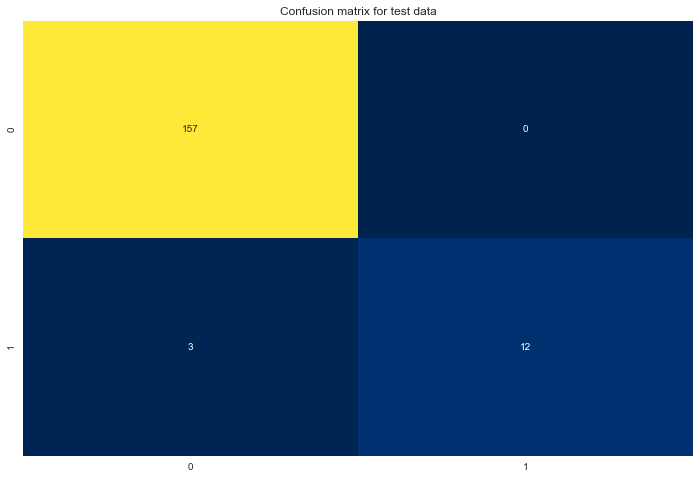

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, fmt="d", cmap="cividis", cbar=False)
plt.title("Confusion matrix for test data")
plt.show()

### The images that are wrongly classified

In [36]:
# Here we find the index location in X_test of the images that were wrongly classified

index_lst=[]
x=0
for i in X_test:
    if y_test[x]!=knn.predict([X_test[x]]):
        index_lst.append(x)
    x+=1

In [37]:
# This cell converts the shape of the pixeldata from a flat list into a nested list. The components of the nested list are:
# pixel height
# pixel width
# RGB values (these three numbers will be identical given that we only look at black and white images)

for i in index_lst:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_test=[]
    for l in X_test[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_test.append(lst)

    # Here we remake the images from the pixel data
    im2 = Image.fromarray((np.array(new_X_test, dtype='uint8')).reshape(shape))
    im2.show()

### The images that are TP

In [55]:
# Here we find the index location in X_test of the Nod images that were correctly classified

index_lst=[]
x=0
for i in X_test:
    if y_test[x]==knn.predict([X_test[x]]) and y_test[x]==1:
        index_lst.append(x)
    x+=1

In [56]:
# This cell converts the shape of the pixeldata from a flat list into a nested list. The components of the nested list are:
# pixel height
# pixel width
# RGB values (these three numbers will be identical given that we only look at black and white images)

for i in index_lst:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_test=[]
    for l in X_test[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_test.append(lst)

    # Here we remake the images from the pixel data
    im2 = Image.fromarray((np.array(new_X_test, dtype='uint8')).reshape(shape))
    im2.show()

## With PCA

We use the same exact steps here as in section 3.2 except that we no longer take the pixel data into consideration. Instead
we use the first 100 components of the PCA.

In [121]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn = GridSearchCV(MLPClassifier(), param_grid=parameter_space, cv=10, scoring="accuracy")
knn.fit(X_train_pca, y_train)
print("Train set score: {:.2f}".format(knn.score(X_train_pca, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test_pca, y_test)))

Train set score: 1.00
Test set score: 0.99


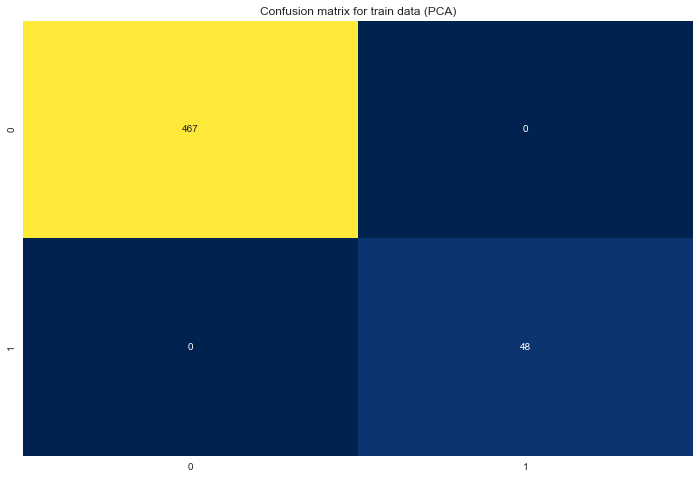

In [122]:
plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_train, knn.predict(X_train_pca)), annot=True, fmt="d", cmap="cividis", cbar=False)
plt.title("Confusion matrix for train data (PCA)")
plt.show()

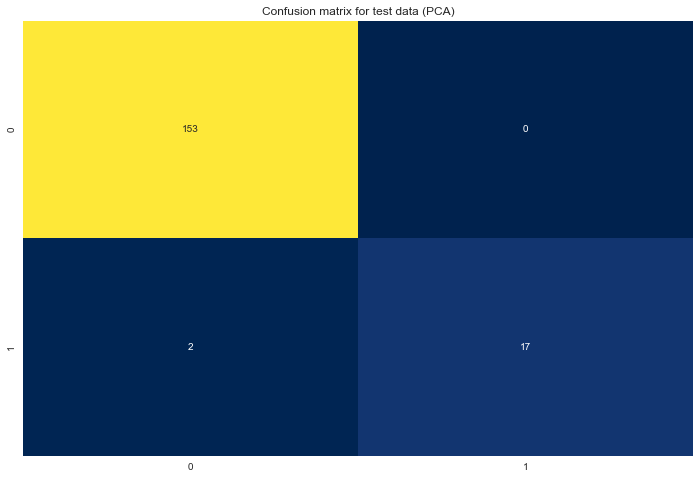

In [123]:
plt.figure(figsize = (12, 8))
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test_pca)), annot=True, fmt="d", cmap="cividis", cbar=False)
plt.title("Confusion matrix for test data (PCA)")
plt.show()

# ML - Can the machine correctly classify the names belonging to the faces?

This is a sub-question that I want to answer. The main difference in this case is the we consider the names beloning to each face to be a class.

In [61]:
# These are the classes from the lfw_people datasets

y_people = people.target[mask]

In [62]:
# These are the classes from the Nod dataset

y_people = np.append(y_people, np.array([max(list(y_people))+1 for i in range(len(lst_an))]), axis=0)
y_people = np.append(y_people, np.array([max(list(y_people))+2 for i in range(len(lst_ax))]), axis=0)
y_people = np.append(y_people, np.array([max(list(y_people))+3 for i in range(len(lst_fi))]), axis=0)
y_people = np.append(y_people, np.array([max(list(y_people))+4 for i in range(len(lst_gu))]), axis=0)
y_people = np.append(y_people, np.array([max(list(y_people))+5 for i in range(len(lst_ke))]), axis=0)
y_people = np.append(y_people, np.array([max(list(y_people))+6 for i in range(len(lst_ni))]), axis=0)
y_people = np.append(y_people, np.array([max(list(y_people))+7 for i in range(len(lst_pi))]), axis=0)
y_people = np.append(y_people, np.array([max(list(y_people))+8 for i in range(len(lst_vi))]), axis=0)

## Model selector

These steps are identical to the previous model

In [63]:
classifiers=[RandomForestClassifier(), SVC(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), RidgeClassifier(), MLPClassifier()]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people)

In [65]:
# Only run once

#for i in classifiers:
#    grid = GridSearchCV(i, cv=10, scoring = "accuracy", param_grid={})

#    try:
#        grid.fit(X_train, y_train)
#    except:
#        grid.fit(X_train.toarray(), y_train)

#    print(i, grid.best_score_, "accuracy")
#    print("")

## MLPClassifier() with accuracy scoring

These steps are identical to the previous model

In [66]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [68]:
knn = GridSearchCV(MLPClassifier(), param_grid=parameter_space, cv=10, scoring="accuracy")
knn.fit(X_train, y_train)
print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Train set score: 0.04
Test set score: 0.01


### Where were our faces assigned? - Andreas
Note: the steps are identical for the subsections below

In [69]:
# We find the index position of the person we're interested in

index_lst=[]

for i in X_people[original_len:(original_len+len(lst_an))]:
    x=0
    for j in X_test:
        if len(list(i))== len(list(j)) and len(list(i)) == sum([1 for k, l in zip(list(i), list(j)) if k == l]):
            index_lst.append(x)
        x+=1

In [72]:
# Here we'll see the name that were assigned to the face beloning to the person in question
for q in index_lst:
    try:
        print(people.target_names[knn.predict([X_test_pca[q]])[0]])
    except:
        if max(list(y_people))+1 == knn.predict([X_test[q]])[0] or max(list(y_people))+2 == knn.predict([X_test[q]])[0] or max(list(y_people))+3 == knn.predict([X_test[q]])[0] or max(list(y_people))+4 == knn.predict([X_test[q]])[0] or max(list(y_people))+5 == knn.predict([X_test[q]])[0] or max(list(y_people))+6 == knn.predict([X_test[q]])[0] or max(list(y_people))+7 == knn.predict([X_test[q]])[0] or max(list(y_people))+8 == knn.predict([X_test[q]])[0]:
            print("One of the Nods!")
        else:
            print("Unknown Name")

            
# Here we again recreate the image from pixel data to see which faces were assigned to the names above
for i in index_lst:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_test=[]
    for l in X_test[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_test.append(lst)

    im2 = Image.fromarray((np.array(new_X_test, dtype='uint8')).reshape(shape))
    im2.show()

Unknown Name


### Where were our faces assigned? - Axel

In [73]:
index_lst=[]

for i in X_people[(original_len+len(lst_an)):((original_len+len(lst_an))+len(lst_ax))]:
    x=0
    for j in X_test:
        if len(list(i))== len(list(j)) and len(list(i)) == sum([1 for k, l in zip(list(i), list(j)) if k == l]):
            index_lst.append(x)
        x+=1

In [74]:
for q in index_lst:
    try:
        print(people.target_names[knn.predict([X_test[q]])[0]])
    except:
        print("Unknown name")

for i in index_lst:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_test=[]
    for l in X_test[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_test.append(lst)

    im2 = Image.fromarray((np.array(new_X_test, dtype='uint8')).reshape(shape))
    im2.show()

### Where were our faces assigned? - Filip

In [76]:
index_lst=[]

for i in X_people[((original_len+len(lst_an))+len(lst_ax)):(((original_len+len(lst_an))+len(lst_ax))+len(lst_fi))]:
    x=0
    for j in X_test:
        if len(list(i))== len(list(j)) and len(list(i)) == sum([1 for k, l in zip(list(i), list(j)) if k == l]):
            index_lst.append(x)
        x+=1

In [77]:
for q in index_lst:
    try:
        print(people.target_names[knn.predict([X_test[q]])[0]])
    except:
        print("Unknown name")

for i in index_lst:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_test=[]
    for l in X_test[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_test.append(lst)

    im2 = Image.fromarray((np.array(new_X_test, dtype='uint8')).reshape(shape))
    im2.show()

### Where were our faces assigned? - Gustav

In [88]:
index_lst=[]

for i in X_people[(((original_len+len(lst_an))+len(lst_ax))+len(lst_fi)):((((original_len+len(lst_an))+len(lst_ax))+len(lst_fi))+len(lst_gu))]:
    x=0
    for j in X_test:
        if len(list(i))== len(list(j)) and len(list(i)) == sum([1 for k, l in zip(list(i), list(j)) if k == l]):
            index_lst.append(x)
        x+=1

In [89]:
for q in index_lst:
    try:
        print(people.target_names[knn.predict([X_test[q]])[0]])
    except:
        print("Unknown name")

for i in index_lst:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_test=[]
    for l in X_test[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_test.append(lst)

    im2 = Image.fromarray((np.array(new_X_test, dtype='uint8')).reshape(shape))
    im2.show()

Unknown name
Alvaro Uribe
Unknown name
Unknown name
Unknown name


### Where were our faces assigned? - Kevin

In [80]:
index_lst=[]

for i in X_people[((((original_len+len(lst_an))+len(lst_ax))+len(lst_fi))+len(lst_gu)):(((((original_len+len(lst_an))+len(lst_ax))+len(lst_fi))+len(lst_gu))+len(lst_ke))]:
    x=0
    for j in X_test:
        if len(list(i))== len(list(j)) and len(list(i)) == sum([1 for k, l in zip(list(i), list(j)) if k == l]):
            index_lst.append(x)
        x+=1

In [81]:
for q in index_lst:
    try:
        print(people.target_names[knn.predict([X_test[q]])[0]])
    except:
        print("Unknown name")

for i in index_lst:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_test=[]
    for l in X_test[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_test.append(lst)

    im2 = Image.fromarray((np.array(new_X_test, dtype='uint8')).reshape(shape))
    im2.show()

### Where were our faces assigned? - Nils

In [82]:
index_lst=[]

for i in X_people[(((((original_len+len(lst_an))+len(lst_ax))+len(lst_fi))+len(lst_gu))+len(lst_ke)):((((((original_len+len(lst_an))+len(lst_ax))+len(lst_fi))+len(lst_gu))+len(lst_ke))+len(lst_ni))]:
    x=0
    for j in X_test:
        if len(list(i))== len(list(j)) and len(list(i)) == sum([1 for k, l in zip(list(i), list(j)) if k == l]):
            index_lst.append(x)
        x+=1

In [83]:
for q in index_lst:
    try:
        print(people.target_names[knn.predict([X_test[q]])[0]])
    except:
        print("Unknown name")

for i in index_lst:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_test=[]
    for l in X_test[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_test.append(lst)

    im2 = Image.fromarray((np.array(new_X_test, dtype='uint8')).reshape(shape))
    im2.show()

Unknown name
Unknown name
Unknown name


### Where were our faces assigned? - Vincent

In [84]:
index_lst=[]

for i in X_people[(((((((original_len+len(lst_an))+len(lst_ax))+len(lst_fi))+len(lst_gu))+len(lst_ke))+len(lst_ni))+len(lst_pi)):((((((((original_len+len(lst_an))+len(lst_ax))+len(lst_fi))+len(lst_gu))+len(lst_ke))+len(lst_ni))+len(lst_pi))+len(lst_vi))]:
    x=0
    for j in X_test:
        if len(list(i))== len(list(j)) and len(list(i)) == sum([1 for k, l in zip(list(i), list(j)) if k == l]):
            index_lst.append(x)
        x+=1

In [85]:
for q in index_lst:
    try:
        print(people.target_names[knn.predict([X_test[q]])[0]])
    except:
        print("Unknown name")

for i in index_lst:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_test=[]
    for l in X_test[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_test.append(lst)

    im2 = Image.fromarray((np.array(new_X_test, dtype='uint8')).reshape(shape))
    im2.show()

Jack Straw
Unknown name
Unknown name
Unknown name
Unknown name


### Where were our faces assigned? - Philip

In [86]:
index_lst=[]

for i in X_people[((((((original_len+len(lst_an))+len(lst_ax))+len(lst_fi))+len(lst_gu))+len(lst_ke))+len(lst_ni)):(((((((original_len+len(lst_an))+len(lst_ax))+len(lst_fi))+len(lst_gu))+len(lst_ke))+len(lst_ni))+len(lst_pi))]:
    x=0
    for j in X_test:
        if len(list(i))== len(list(j)) and len(list(i)) == sum([1 for k, l in zip(list(i), list(j)) if k == l]):
            index_lst.append(x)
        x+=1

In [87]:
for q in index_lst:
    try:
        print(people.target_names[knn.predict([X_test[q]])[0]])
    except:
        print("Unknown name")

for i in index_lst:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst.append(X_test[i][x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    n = np.array(lst_h)*255
    
    shape = n.shape

    new_X_test=[]
    for l in X_test[i]:
        lst=[]
        lst.append(l*255)
        lst.append(l*255)
        lst.append(l*255)
        new_X_test.append(lst)

    im2 = Image.fromarray((np.array(new_X_test, dtype='uint8')).reshape(shape))
    im2.show()

## With PCA

In [45]:
# Again wee see if the model performs better when looking at pca components in comparison to raw pixel data

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn = GridSearchCV(MLPClassifier(), param_grid=parameter_space, cv=10, scoring="accuracy")
knn.fit(X_train_pca, y_train)
print("Train set accuracy: {:.2f}".format(knn.score(X_train_pca, y_train)))
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Train set accuracy: 1.00
Test set accuracy: 0.23


## Using a model built from keras

Using the steps from https://stackabuse.com/image-recognition-in-python-with-tensorflow-and-keras we try to build a cnn model from scratch to see how it compares to the MLPClassier.

Note: this model only works for large enough data sets.

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [85]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [86]:
model = Sequential()

In [87]:
the_X_train=[]
for i in X_train:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(i[x])
            lst.append(i[x])
            lst.append(i[x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    the_X_train.append(lst_h)
X_train=np.array(the_X_train)

In [88]:
the_X_test=[]
for i in X_test:
    x=0
    lst_h=[]
    for j in range(0, 87):
        lst_w=[]
        for k in range(0, 65):
            lst=[]
            lst.append(i[x])
            lst.append(i[x])
            lst.append(i[x])
            lst_w.append(lst)
            x+=1
        lst_h.append(lst_w)
    the_X_test.append(lst_h)
X_test=np.array(the_X_test)

In [89]:
model.add(Conv2D(65, (6, 6), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))

In [90]:
model.add(Dropout(0.2))

In [91]:
model.add(BatchNormalization())

In [92]:
model.add(Conv2D(130, (6, 6), padding='same'))
model.add(Activation('relu'))

In [93]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [94]:
model.add(Conv2D(130, (6, 6), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Conv2D(260, (6, 6), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [95]:
model.add(Flatten())
model.add(Dropout(0.2))

In [96]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [97]:
model.add(Dense(class_num))
model.add(Activation('softmax'))

In [98]:
epochs = 25
optimizer = 'adam'

In [99]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [100]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 87, 65, 65)        7085      
_________________________________________________________________
activation (Activation)      (None, 87, 65, 65)        0         
_________________________________________________________________
dropout (Dropout)            (None, 87, 65, 65)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 87, 65, 65)        260       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 65, 130)       304330    
_________________________________________________________________
activation_1 (Activation)    (None, 87, 65, 130)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 32, 130)       0

In [101]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64) # Note that the validation data is equal to the test data. This is an incorrect use of the test data. The reason why I make this shortcut is that I just want an idea of how the model will perform

Epoch 1/25


ValueError: in user code:

    C:\Users\kebbe\anaconda3\lib\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    C:\Users\kebbe\anaconda3\lib\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    C:\Users\kebbe\anaconda3\lib\site-packages\keras\engine\training.py:771 train_step  *
        loss = self.compiled_loss(
    C:\Users\kebbe\anaconda3\lib\site-packages\keras\engine\compile_utils.py:201 __call__  *
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\kebbe\anaconda3\lib\site-packages\keras\losses.py:142 __call__  *
        losses = call_fn(y_true, y_pred)
    C:\Users\kebbe\anaconda3\lib\site-packages\keras\losses.py:246 call  *
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\kebbe\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    C:\Users\kebbe\anaconda3\lib\site-packages\keras\losses.py:1630 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\kebbe\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\kebbe\anaconda3\lib\site-packages\keras\backend.py:4827 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\kebbe\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 98) and (None, 90) are incompatible


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

## Can the machine correctly classify the names belonging to the faces if we use Nod only?

If we remove all the noise (i.e. the lfw_people dataset), will the machine have an easier time connecting the faces of Nod to the correct name?

In [148]:
X_people = np.append(lst_an, lst_ax, axis=0)
X_people = np.append(X_people, lst_fi, axis=0)
X_people = np.append(X_people, lst_gu, axis=0)
X_people = np.append(X_people, lst_ke, axis=0)
X_people = np.append(X_people, lst_ni, axis=0)
X_people = np.append(X_people, lst_pi, axis=0)
X_people = np.append(X_people, lst_vi, axis=0)
X_people = X_people/255

In [149]:
y_people = np.append(np.array([1 for i in range(len(lst_an))]), np.array([2 for i in range(len(lst_ax))]), axis=0)
y_people = np.append(y_people, np.array([3 for i in range(len(lst_fi))]), axis=0)
y_people = np.append(y_people, np.array([4 for i in range(len(lst_gu))]), axis=0)
y_people = np.append(y_people, np.array([5 for i in range(len(lst_ke))]), axis=0)
y_people = np.append(y_people, np.array([6 for i in range(len(lst_ni))]), axis=0)
y_people = np.append(y_people, np.array([7 for i in range(len(lst_pi))]), axis=0)
y_people = np.append(y_people, np.array([8 for i in range(len(lst_vi))]), axis=0)

### Model selector

In [150]:
classifiers=[RandomForestClassifier(), SVC(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), RidgeClassifier(), MLPClassifier()]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people)

In [152]:
# Only run once

#for i in classifiers:
#    grid = GridSearchCV(i, cv=10, scoring = "accuracy", param_grid={})

#    try:
#        grid.fit(X_train, y_train)
#    except:
#        grid.fit(X_train.toarray(), y_train)

#    print(i, grid.best_score_, "accuracy")
#    print("")

### MLPClassifier() with accuracy scoring

In [153]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [143]:
knn = GridSearchCV(MLPClassifier(), param_grid=parameter_space, cv=5, scoring="accuracy")
knn.fit(X_train, y_train)
print("Train set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Train set score: 1.00
Test set score: 0.41


In [155]:
# Again wee see if the model performs better when looking at pca components in comparison to raw pixel data
pca = PCA(n_components=25, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn = GridSearchCV(MLPClassifier(), param_grid=parameter_space, cv=5, scoring="accuracy")
knn.fit(X_train_pca, y_train)
print("Train set accuracy: {:.2f}".format(knn.score(X_train_pca, y_train)))
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Train set accuracy: 1.00
Test set accuracy: 0.59
